#NAME: ANISH A
#REG.NO: 212224060020
#EXP.NO: 1
#EXP.NAME: IDEAL,NATURAL,FLAT-TOP SAMPLING

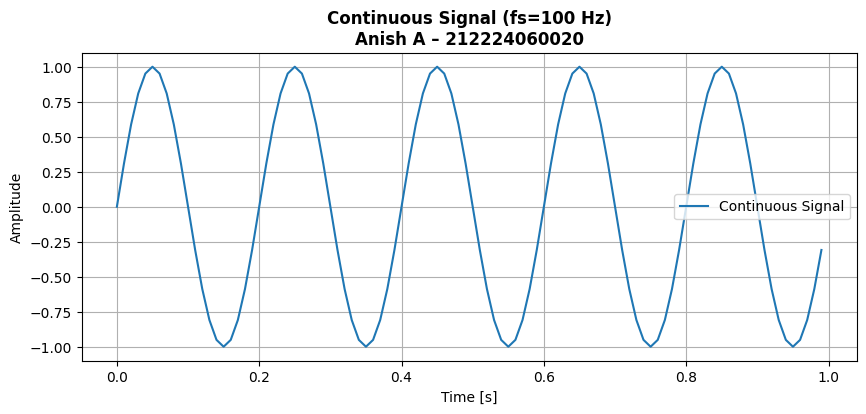

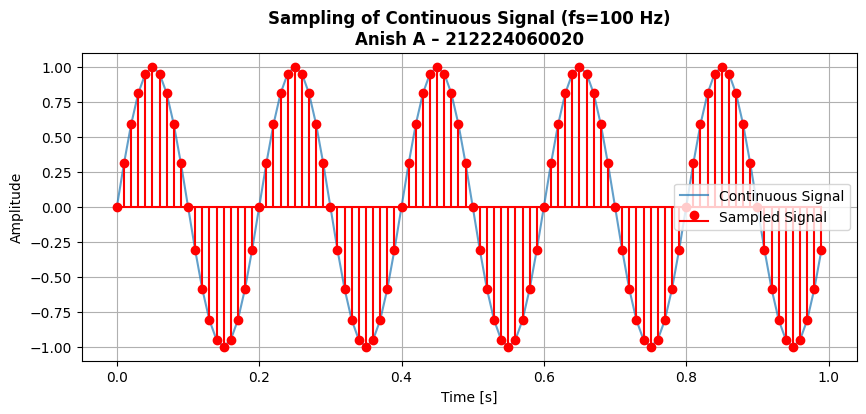

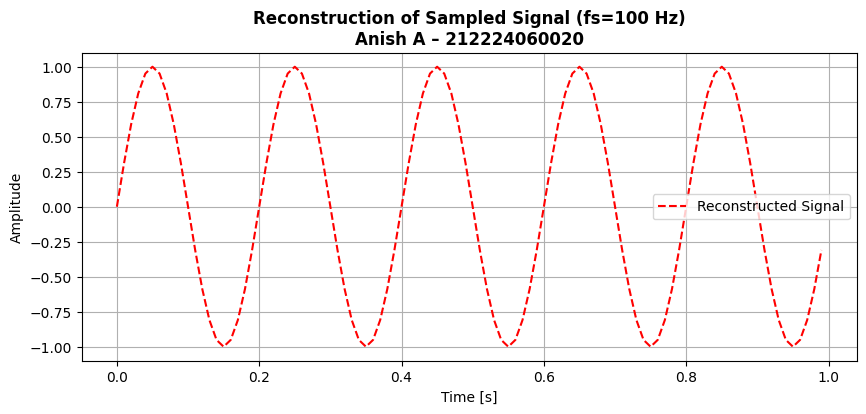

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

fs = 100
t = np.arange(0, 1, 1/fs)
f = 5
signal = np.sin(2 * np.pi * f * t)

# Plot continuous signal
plt.figure(figsize=(10,4))
plt.plot(t, signal, label='Continuous Signal')
plt.title('Continuous Signal (fs=100 Hz)\nAnish A – 212224060020', fontsize=12, fontweight='bold')
plt.xlabel('Time [s]'); plt.ylabel('Amplitude')
plt.grid(True); plt.legend(); plt.show()

# Sampling
t_s = np.arange(0, 1, 1/fs)
signal_s = np.sin(2 * np.pi * f * t_s)

plt.figure(figsize=(10,4))
plt.plot(t, signal, alpha=0.7, label='Continuous Signal')
plt.stem(t_s, signal_s, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal')
plt.title('Sampling of Continuous Signal (fs=100 Hz)\nAnish A – 212224060020', fontsize=12, fontweight='bold')
plt.xlabel('Time [s]'); plt.ylabel('Amplitude')
plt.grid(True); plt.legend(); plt.show()

# Reconstruction
recon = resample(signal_s, len(t))
plt.figure(figsize=(10,4))
plt.plot(t, recon, 'r--', label='Reconstructed Signal')
plt.title('Reconstruction of Sampled Signal (fs=100 Hz)\nAnish A – 212224060020', fontsize=12, fontweight='bold')
plt.xlabel('Time [s]'); plt.ylabel('Amplitude')
plt.grid(True); plt.legend(); plt.show()


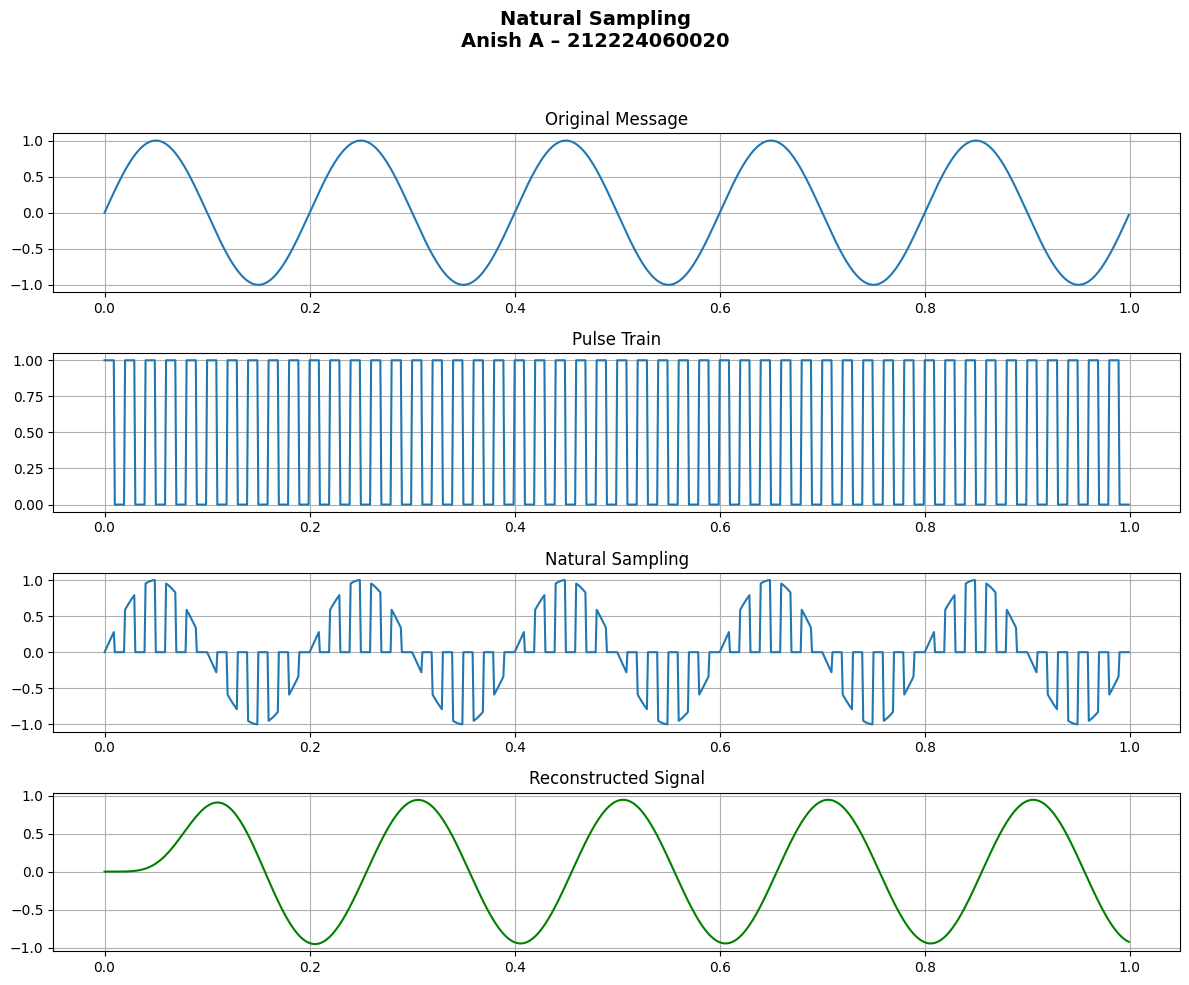

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

fs, T, fm, pulse_rate = 1000, 1, 5, 50
t = np.arange(0, T, 1/fs)
msg = np.sin(2 * np.pi * fm * t)

# Natural sampling
pw = int(fs / pulse_rate / 2)
pulse = np.zeros_like(t)
pulse[::int(fs / pulse_rate)] = 1
for i in range(0, len(t), int(fs / pulse_rate)):
    pulse[i:i+pw] = 1
nat_signal = msg * pulse

sampled = nat_signal[pulse==1]
sample_times = t[pulse==1]

# Reconstruction - Zero-order hold + low-pass filter
recon = np.zeros_like(t)
for i, time in enumerate(sample_times):
    idx = np.argmin(np.abs(t-time))
    recon[idx:idx+pw] = sampled[i]

def lp(sig, fc, fs, order=5):
    b, a = butter(order, fc/(0.5*fs), btype='low')
    return lfilter(b, a, sig)

recon = lp(recon, 10, fs)

# Plot
plt.figure(figsize=(12,10))
plt.suptitle("Natural Sampling\nAnish A – 212224060020", fontsize=14, fontweight='bold')

plt.subplot(4,1,1); plt.plot(t,msg); plt.title("Original Message"); plt.grid(True)
plt.subplot(4,1,2); plt.plot(t,pulse); plt.title("Pulse Train"); plt.grid(True)
plt.subplot(4,1,3); plt.plot(t,nat_signal); plt.title("Natural Sampling"); plt.grid(True)
plt.subplot(4,1,4); plt.plot(t,recon,'green'); plt.title("Reconstructed Signal"); plt.grid(True)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()



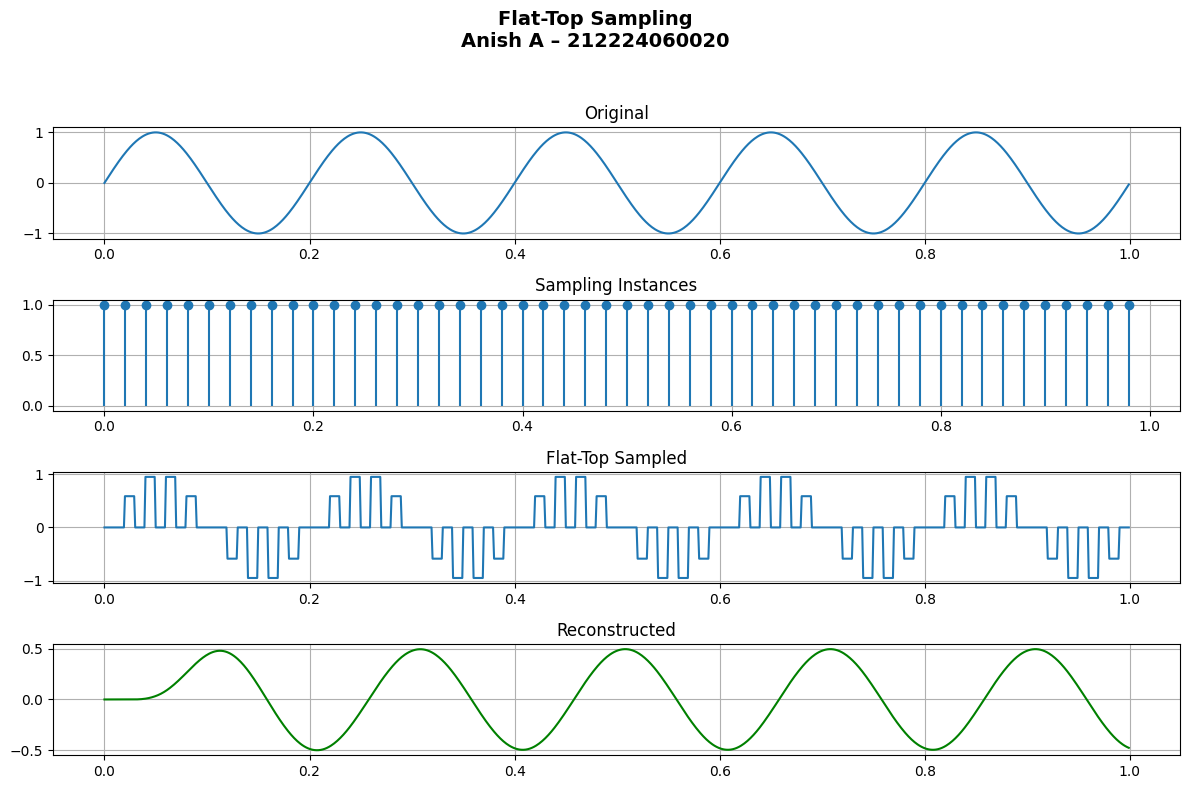

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

fs, T, fm, pulse_rate = 1000, 1, 5, 50
t = np.arange(0, T, 1/fs)
msg = np.sin(2*np.pi*fm*t)

# Flat-top sampling
pulse_train = np.zeros_like(t)
idx = np.arange(0, len(t), int(fs/pulse_rate))
pulse_train[idx] = 1
flat_top = np.zeros_like(t)
pw = int(fs/(2*pulse_rate))
for i in idx:
    flat_top[i:i+pw] = msg[i]

# Low-pass filter
def lp(sig, fc, fs, order=5):
    b, a = butter(order, fc/(0.5*fs), btype='low')
    return lfilter(b, a, sig)
recon = lp(flat_top, 2*fm, fs)

# Plot
plt.figure(figsize=(12,8))
plt.suptitle("Flat-Top Sampling\nAnish A – 212224060020", fontsize=14, fontweight='bold')

plt.subplot(4,1,1); plt.plot(t,msg); plt.title("Original"); plt.grid(True)
plt.subplot(4,1,2); plt.stem(t[idx], pulse_train[idx], basefmt=" "); plt.title("Sampling Instances"); plt.grid(True)
plt.subplot(4,1,3); plt.plot(t,flat_top); plt.title("Flat-Top Sampled"); plt.grid(True)
plt.subplot(4,1,4); plt.plot(t,recon,'green'); plt.title("Reconstructed"); plt.grid(True)
plt.tight_layout(rect=[0,0,1,0.95]); plt.show()
